In [33]:
"""
Title: SDOH Dataset Feature Selection and Exploratory Data Analysis (EDA)

Description:
This script processes the 2020 Social Determinants of Health (SDOH) dataset merged with
hospital bed utilization data to support early-phase exploratory analysis and predictive modeling.
It includes correlation-based feature selection, feature renaming for clarity, and a series of
descriptive statistics and visualizations.

Main Workflow:

1. Data Loading and Initial Exploration:
   - Loads the merged SDOH and hospital bed utilization dataset from Excel.
   - Displays structure, types, missing values, and summary statistics.

2. Feature Selection:
   - Calculates absolute Pearson correlations between numeric predictors and the target ('BED_UTIL_RATIO').
   - Selects the top 20 correlated features along with key geographic identifiers: FIPS, State, County, and Region.

3. Feature Renaming:
   - Renames selected features using a standardized naming convention for clarity.
   - Moves the key target variable ('Bed_util_ratio') and binary indicator ('Is_Metro_Micro') to the end.

4. Dataset Export:
   - Saves the cleaned and renamed dataset to both CSV and Excel formats for downstream modeling.

5. Descriptive Statistics:
   - Generates central tendency and dispersion metrics for all numeric columns.
   - Computes skewness and kurtosis to assess distribution shapes.
   - Saves the outputs into dedicated CSV files for reference and audit.

6. Exploratory Visualizations:
   - Distribution (histogram + KDE) plot of the target variable.
   - Boxplot to compare utilization across U.S. regions.
   - Correlation heatmap of top variables with the target.

7. Geospatial Mapping:
   - Constructs a county-level choropleth map using Plotly to visualize regional variation in hospital bed utilization.
   - Uses GeoJSON boundary data and FIPS codes for accurate geographic mapping.

Inputs:
- 'MERGED_SDOH_PLUS_BED UTIL RATIO.xlsx': Merged dataset with SDOH features and hospital bed utilization data.

Outputs:
- 'MERGED_SDOH_PLUS_UTIL_24_RenamedColumns.xlsx' / .csv: Final cleaned dataset with selected and renamed features.
- 'Descriptive_Stats_Main.csv', 'Skewness_Kurtosis.csv', 'Descriptive_Stats_Full.csv': Statistics outputs.
- Choropleth map visualizing hospital bed utilization by U.S. county.

Note:
- The target variable 'Bed_util_ratio' is used consistently after renaming.
- This script is meant for initial data understanding, feature curation, and visualization before modeling.
"""

# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load SDOH - 2020 Dataset with Full Features

In [34]:
df = pd.read_excel('/content/MERGED_SDOH_PLUS_BED UTIL RATIO.xlsx')
df.head()

,COUNTYFIPS,STATE,COUNTY,REGION,ACS_TOT_POP_POV_sum,ACS_AVG_HH_SIZE_avg,ACS_PCT_DISABLE_avg,ACS_PCT_ENGL_NOT_ALL_avg,ACS_PCT_AGE_ABOVE65_avg,ACS_PCT_HH_INTERNET_avg,...,ACS_PCT_UNINSURED_BELOW64_avg,CEN_AREALAND_SQM_TRACT_avg,CEN_POPDENSITY_TRACT_avg,WUSTL_AVG_PM25_avg,POS_DIST_ED_TRACT_avg,POS_DIST_MEDSURG_ICU_TRACT_avg,POS_DIST_TRAUMA_TRACT_avg,POS_DIST_CLINIC_TRACT_avg,BED_UTIL_RATIO,IS_METRO_MICRO
0,1001,Alabama,Autauga County,South,55181.0,2.647058,17.470588,0.000000,15.352941,82.352941,...,9.411764,34.941176,937.529411,7.176470,5.294117,5.352941,14.705882,9.000000,0.378106,1.0
1,1003,Alabama,Baldwin County,South,215170.0,2.454545,13.977272,0.068181,21.681818,83.204545,...,12.159090,36.090909,506.772727,8.227272,6.409090,7.500000,25.068181,8.181818,0.504948,1.0
2,1005,Alabama,Barbour County,South,22070.0,2.222222,19.111111,0.333333,19.777777,65.000000,...,12.888888,98.333333,130.666666,7.000000,8.666666,8.666666,41.222222,2.222222,0.284690,1.0
3,1007,Alabama,Bibb County,South,20748.0,3.125000,18.000000,0.000000,16.250000,74.875000,...,10.750000,77.875000,76.125000,6.625000,8.500000,21.250000,27.000000,4.375000,0.286999,1.0
4,1009,Alabama,Blount County,South,57127.0,2.687500,15.000000,0.312500,18.500000,80.187500,...,13.187500,40.312500,112.187500,7.000000,9.625000,9.750000,27.250000,4.125000,0.304907,1.0


# Explore Dataset before Feature Selection

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COUNTYFIPS                        3239 non-null   int64  
 1   STATE                             3239 non-null   object 
 2   COUNTY                            3234 non-null   object 
 3   REGION                            3143 non-null   object 
 4   ACS_TOT_POP_POV_sum               3234 non-null   float64
 5   ACS_AVG_HH_SIZE_avg               3234 non-null   float64
 6   ACS_PCT_DISABLE_avg               3234 non-null   float64
 7   ACS_PCT_ENGL_NOT_ALL_avg          3234 non-null   float64
 8   ACS_PCT_AGE_ABOVE65_avg           3234 non-null   float64
 9   ACS_PCT_HH_INTERNET_avg           3234 non-null   float64
 10  ACS_PCT_CHILD_1FAM_avg            3234 non-null   float64
 11  ACS_MEDIAN_HH_INC_sum             3234 non-null   float64
 12  ACS_PC

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
COUNTYFIPS,3239.0,31504.662550,16462.990939,1001.000000,19032.000000,30033.000000,46126.000000,7.803000e+04
ACS_TOT_POP_POV_sum,3234.0,98504.677798,322472.553341,0.000000,9612.250000,23553.000000,63324.000000,9.884138e+06
ACS_AVG_HH_SIZE_avg,3234.0,2.368952,0.548788,0.000000,2.107777,2.402154,2.666666,5.000000e+00
ACS_PCT_DISABLE_avg,3234.0,15.578153,5.201365,0.000000,12.625893,15.333333,18.600000,4.800000e+01
ACS_PCT_ENGL_NOT_ALL_avg,3234.0,0.430450,1.133230,0.000000,0.000000,0.062500,0.375000,2.200000e+01
ACS_PCT_AGE_ABOVE65_avg,3234.0,18.824671,5.719314,0.000000,16.000000,18.818181,21.666666,4.985714e+01
ACS_PCT_HH_INTERNET_avg,3234.0,75.692203,15.459853,0.000000,72.762500,79.000000,83.500000,9.700000e+01
ACS_PCT_CHILD_1FAM_avg,3234.0,28.569577,11.430103,0.000000,22.112857,28.160256,34.526900,9.700000e+01
ACS_MEDIAN_HH_INC_sum,3234.0,53803.784787,17732.176889,0.000000,44620.500000,52881.500000,61834.750000,1.485230e+05
ACS_PCT_HH_INC_10000_avg,3234.0,6.583173,3.564438,0.000000,4.250000,6.000000,8.166666,2.850000e+01


In [37]:
df.isna().sum()

,0
COUNTYFIPS,0
STATE,0
COUNTY,5
REGION,96
ACS_TOT_POP_POV_sum,5
ACS_AVG_HH_SIZE_avg,5
ACS_PCT_DISABLE_avg,5
ACS_PCT_ENGL_NOT_ALL_avg,5
ACS_PCT_AGE_ABOVE65_avg,5
ACS_PCT_HH_INTERNET_avg,5


In [38]:
# Display structure and summary
print(df.shape)
print(df.dtypes.value_counts())

(3239, 45)
float64    41
object      3
int64       1
Name: count, dtype: int64


# Identify features that are correlated with BED_UTIL_RATIO

Feature Selection - Identify Top 20 features correlates with Bed Hospitalization Utility

Correlation Matrix

In [39]:
# Identify numeric features
df_corr = df.select_dtypes(include=['int', 'float']).corr()

# Compute absolute correlation with target
correlation_with_target = df_corr['BED_UTIL_RATIO'].abs().sort_values(ascending=False)

# Convert to DataFrame for table display
correlation_table = pd.DataFrame({
    'Feature': correlation_with_target.index,
    'Absolute Correlation': correlation_with_target.values
})

# Display top 20 correlated features in table format
print(correlation_table.head(20).to_string(index=False))

# Select top 20 most correlated predictors (including BED_UTIL_RATIO)
top_20_corr_features = correlation_table['Feature'][:20].tolist()

# Add categorical/geographic identifiers
selected_features = ['COUNTYFIPS', 'STATE', 'COUNTY', 'REGION'] + top_20_corr_features

# Confirm final feature count
print(f"\nTotal selected features: {len(selected_features)}")
print("Selected features:", selected_features)

                         Feature  Absolute Correlation
                  BED_UTIL_RATIO              1.000000
                  IS_METRO_MICRO              0.404766
           ACS_PCT_RENTER_HU_avg              0.286737
  POS_DIST_MEDSURG_ICU_TRACT_avg              0.278767
ACS_PCT_RENTER_HU_COST_50PCT_avg              0.248769
ACS_PCT_RENTER_HU_COST_30PCT_avg              0.246322
             ACS_TOT_POP_POV_sum              0.243171
 ACS_PCT_OWNER_HU_COST_30PCT_avg              0.231916
        CEN_POPDENSITY_TRACT_avg              0.224611
      CEN_AREALAND_SQM_TRACT_avg              0.221157
           ACS_MEDIAN_HH_INC_sum              0.197687
    ACS_PCT_HH_ALONE_ABOVE65_avg              0.195666
         ACS_PCT_AGE_ABOVE65_avg              0.188541
           ACS_PCT_HU_NO_VEH_avg              0.174349
        ACS_PCT_PUBL_TRANSIT_avg              0.167792
          ACS_PCT_CHILD_1FAM_avg              0.161295
         ACS_PCT_HH_INTERNET_avg              0.154939
          

# Rename Top Selected Features

In [40]:
# Select final features from full dataframe BEFORE renaming
df_selected = df[selected_features]

# Renaming function
def rename_columns(df):
    new_column_names = {
        "COUNTYFIPS": "CountyFIPS",
        "STATE": "State",
        "COUNTY": "County",
        "REGION": "Region",
        "ACS_TOT_POP_POV_sum": "Total_population_poverty",
        "ACS_MEDIAN_HH_INC_sum": "Median_hh_income",
        "ACS_PCT_AGE_ABOVE65_avg": "Pct_age_65plus",
        "ACS_PCT_CHILD_1FAM_avg": "Pct_single_parent",
        "ACS_PCT_DISABLE_avg": "Pct_disabled",
        "ACS_PCT_HH_ALONE_ABOVE65_avg": "Pct_hh_65_alone",
        "ACS_PCT_HH_INTERNET_avg": "Pct_hh_no_internet",
        "ACS_PCT_HU_MOBILE_HOME_avg": "Pct_mobile_homes",
        "ACS_PCT_HU_NO_VEH_avg": "Pct_homes_no_vehicle",
        "ACS_PCT_OWNER_HU_COST_30PCT_avg": "Pct_owner_cost_30plus",
        "ACS_PCT_PUBL_TRANSIT_avg": "Pct_public_transit",
        "ACS_PCT_RENTER_HU_avg": "Pct_renter_occupied",
        "ACS_PCT_RENTER_HU_COST_30PCT_avg": "Pct_renter_cost_30pct_plus",
        "ACS_PCT_RENTER_HU_COST_50PCT_avg": "Pct_renter_cost_50pct_plus",
        "CEN_AREALAND_SQM_TRACT_avg": "Land_area_sqmi",
        "CEN_POPDENSITY_TRACT_avg": "Population_density",
        "POS_DIST_ED_TRACT_avg": "Distance_to_ED",
        "POS_DIST_MEDSURG_ICU_TRACT_avg": "Distance_to_medsurge_icu",
        "IS_METRO_MICRO": "Is_Metro_Micro",
        "BED_UTIL_RATIO": "Bed_util_ratio",
    }

    # Rename columns
    df = df.rename(columns=new_column_names)

    # Move "Is_Metro_Micro" and "Bed_util_ratio" to the end if they exist
    end_cols = ["Is_Metro_Micro", "Bed_util_ratio"]
    other_cols = [col for col in df.columns if col not in end_cols]
    final_order = other_cols + [col for col in end_cols if col in df.columns]

    return df[final_order]



df_selected = rename_columns(df_selected)
df_selected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CountyFIPS                  3239 non-null   int64  
 1   State                       3239 non-null   object 
 2   County                      3234 non-null   object 
 3   Region                      3143 non-null   object 
 4   Pct_renter_occupied         3234 non-null   float64
 5   Distance_to_medsurge_icu    3234 non-null   float64
 6   Pct_renter_cost_50pct_plus  3234 non-null   float64
 7   Pct_renter_cost_30pct_plus  3234 non-null   float64
 8   Total_population_poverty    3234 non-null   float64
 9   Pct_owner_cost_30plus       3234 non-null   float64
 10  Population_density          3234 non-null   float64
 11  Land_area_sqmi              3234 non-null   float64
 12  Median_hh_income            3234 non-null   float64
 13  Pct_hh_65_alone             3234 

# Save Dataset with New Features to excel.

In [41]:
# Save Dataset with New Features to excel.
df_selected.to_csv('MERGED_SDOH_PLUS_UTIL_24_RenamedColumns.csv', index= False)
df_selected.to_excel('MERGED_SDOH_PLUS_UTIL_24_RenamedColumns.xlsx', index= False)

# Explore Dataset After Feature Selection

Final Dataset

In [42]:
# Final dataset for EDA
# df_selected = df[selected_features]
df_selected.head().T

,0,1,2,3,4
CountyFIPS,1001,1003,1005,1007,1009
State,Alabama,Alabama,Alabama,Alabama,Alabama
County,Autauga County,Baldwin County,Barbour County,Bibb County,Blount County
Region,South,South,South,South,South
Pct_renter_occupied,24.941176,22.727272,37.888888,24.5,24.0625
Distance_to_medsurge_icu,5.352941,7.5,8.666666,21.25,9.75
Pct_renter_cost_50pct_plus,28.352941,19.545454,20.666666,27.75,23.5625
Pct_renter_cost_30pct_plus,43.17647,43.795454,46.222222,49.625,47.875
Total_population_poverty,55181.0,215170.0,22070.0,20748.0,57127.0
Pct_owner_cost_30plus,19.588235,20.227272,16.333333,13.25,15.1875


In [43]:
# df_selected info
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CountyFIPS                  3239 non-null   int64  
 1   State                       3239 non-null   object 
 2   County                      3234 non-null   object 
 3   Region                      3143 non-null   object 
 4   Pct_renter_occupied         3234 non-null   float64
 5   Distance_to_medsurge_icu    3234 non-null   float64
 6   Pct_renter_cost_50pct_plus  3234 non-null   float64
 7   Pct_renter_cost_30pct_plus  3234 non-null   float64
 8   Total_population_poverty    3234 non-null   float64
 9   Pct_owner_cost_30plus       3234 non-null   float64
 10  Population_density          3234 non-null   float64
 11  Land_area_sqmi              3234 non-null   float64
 12  Median_hh_income            3234 non-null   float64
 13  Pct_hh_65_alone             3234 

In [44]:
# Display structure and summary of new dataset
print(df_selected.shape)
print(df_selected.dtypes.value_counts())

# -----------------------------------------

# Overview
print("\n--- Dataset Overview ---")
print("Shape:", df_selected.shape)
print("Columns:", df_selected.columns.tolist())

(3239, 24)
float64    20
object      3
int64       1
Name: count, dtype: int64

--- Dataset Overview ---
Shape: (3239, 24)
Columns: ['CountyFIPS', 'State', 'County', 'Region', 'Pct_renter_occupied', 'Distance_to_medsurge_icu', 'Pct_renter_cost_50pct_plus', 'Pct_renter_cost_30pct_plus', 'Total_population_poverty', 'Pct_owner_cost_30plus', 'Population_density', 'Land_area_sqmi', 'Median_hh_income', 'Pct_hh_65_alone', 'Pct_age_65plus', 'Pct_homes_no_vehicle', 'Pct_public_transit', 'Pct_single_parent', 'Pct_hh_no_internet', 'Distance_to_ED', 'Pct_mobile_homes', 'Pct_disabled', 'Is_Metro_Micro', 'Bed_util_ratio']


# EDA Exploration

Descriptive Statistics, Skewness, Kurtosis

In [45]:
# Descriptive Statistics
numeric_df_selected = df_selected.select_dtypes(include=['float64', 'int64'])
desc_stats = numeric_df_selected.describe().T

# Add skewness and kurtosis columns
desc_stats['skewness'] = numeric_df_selected.skew()
desc_stats['kurtosis'] = numeric_df_selected.kurtosis()

# Main Descriptive Statistics
main_stats = desc_stats.drop(columns=["skewness", "kurtosis"])
main_stats.to_csv("Descriptive_Stats_Main.csv")
print("\n--- Main Descriptive Statistics ---")
print(main_stats.to_string(float_format='%.2f'))

# Skewness and Kurtosis Only
sk_kurt = desc_stats[["skewness", "kurtosis"]]
sk_kurt.to_csv("Skewness_Kurtosis.csv")
print("\n--- Skewness and Kurtosis ---")
print(sk_kurt.to_string(float_format='%.2f'))

# Full Table
desc_stats.to_csv("Descriptive_Stats_Full.csv")
print("\n--- Full Descriptive Statistics Table ---")
print(desc_stats.to_string(float_format='%.2f'))


--- Main Descriptive Statistics ---
                             count     mean       std     min      25%      50%      75%        max
CountyFIPS                 3239.00 31504.66  16462.99 1001.00 19032.00 30033.00 46126.00   78030.00
Pct_renter_occupied        3234.00    26.78      9.63    0.00    21.33    26.00    31.80      82.00
Distance_to_medsurge_icu   3234.00    12.57     17.67    0.00     4.67     7.30    16.50     487.00
Pct_renter_cost_50pct_plus 3234.00    18.63      7.79    0.00    14.28    18.84    23.29      75.00
Pct_renter_cost_30pct_plus 3234.00    39.68     12.04    0.00    34.00    41.00    46.76     100.00
Total_population_poverty   3234.00 98504.68 322472.55    0.00  9612.25 23553.00 63324.00 9884138.00
Pct_owner_cost_30plus      3234.00    17.71      5.73    0.00    14.83    17.50    20.70      42.75
Population_density         3234.00   891.21   2798.16    0.00    41.52   209.10   907.02   90386.23
Land_area_sqmi             3234.00   289.39   1296.98    0.00  

In [46]:
# Categorical Value Counts
categorical_cols = ['REGION', 'STATE', 'COUNTY']
for col in categorical_cols:
    if col in df_selected.columns:
        value_counts_df_selected = df_selected[col].value_counts(dropna=False).reset_index()
        value_counts_df_selected.columns = [col, 'Count']
        print("-" * 30)
        print(f"\nValue Counts for {col}:\n")
        print(value_counts_df_selected.to_string(index=False))




# Visualization

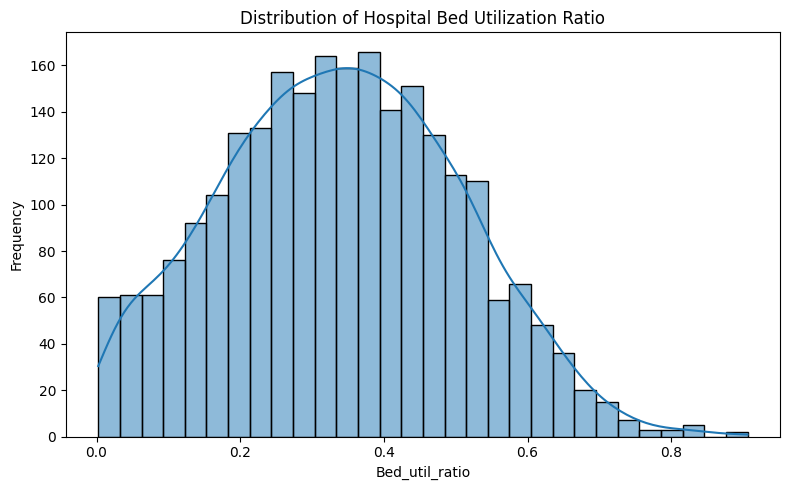

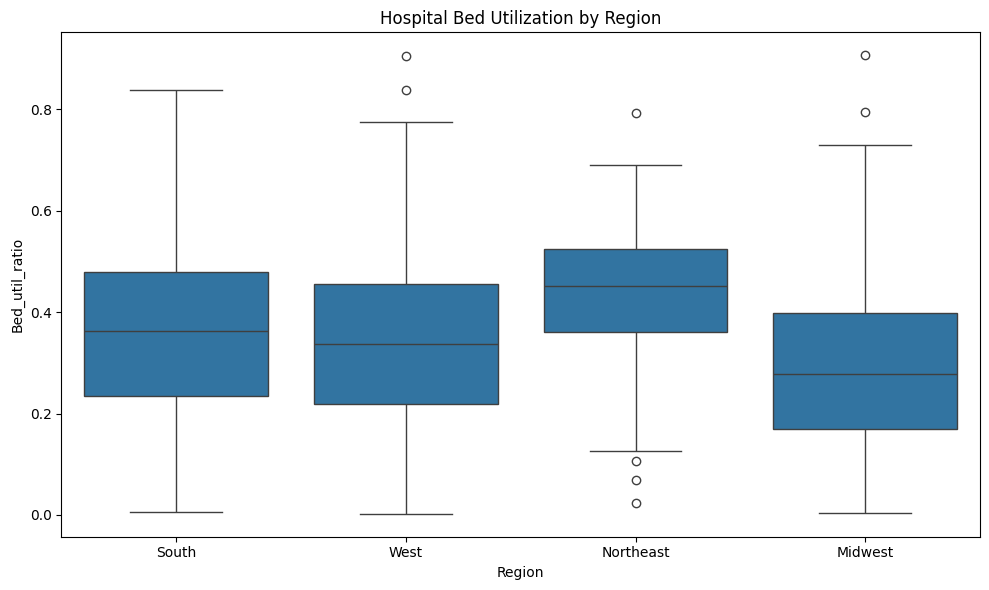

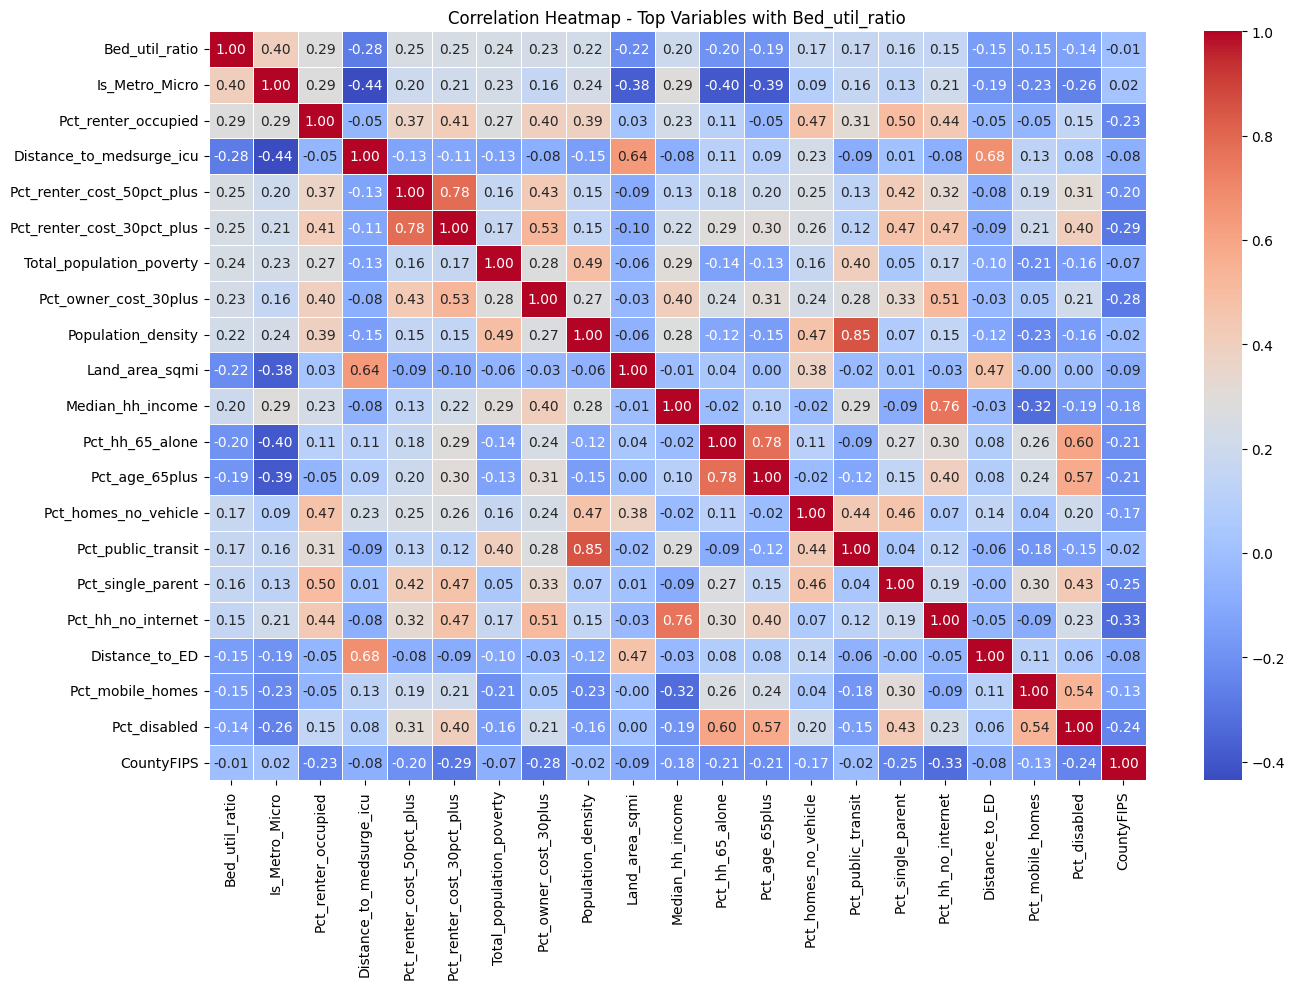

In [47]:
# Histogram of Bed_util_ratio
plt.figure(figsize=(8, 5))
sns.histplot(df_selected['Bed_util_ratio'], kde=True, bins=30)
plt.title("Distribution of Hospital Bed Utilization Ratio")
plt.xlabel("Bed_util_ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
# ---------

# Boxplot by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected, x="Region", y="Bed_util_ratio")
plt.title("Hospital Bed Utilization by Region")
plt.xlabel("Region")
plt.ylabel("Bed_util_ratio")
plt.tight_layout()
plt.show()
# ---------

# Correlation Matrix Table
corr_matrix = df_selected.corr(numeric_only=True)
top_corr_vars = corr_matrix['Bed_util_ratio'].abs().sort_values(ascending=False).index
# ---------

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_selected[top_corr_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5,
    annot_kws={"size": 10})
plt.title("Correlation Heatmap - Top Variables with Bed_util_ratio")
plt.tight_layout()
plt.show()


# County-Level Hospital Bed Utilization

In [48]:
# Import required libraries
import pandas as pd
import geopandas as gpd
import plotly.express as px


# Ensure FIPS is string and padded to 5 digits
df_selected['CountyFIPS'] = df_selected['CountyFIPS'].astype(str).str.zfill(5)

# Filter only necessary columns
map_df_selected = df_selected[['CountyFIPS', 'Bed_util_ratio']].dropna()

# Load GeoJSON for US counties (you can download from https://eric.clst.org/tech/usgeojson/)
geojson_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"

# Plotly Choropleth
fig = px.choropleth(
    map_df_selected,
    geojson=geojson_url,
    locations='CountyFIPS',
    color='Bed_util_ratio',
    color_continuous_scale="YlOrRd",
    scope="usa",
    labels={'Bed_util_ratio': 'Hospital Bed Utilization'},
    title="County-Level Hospital Bed Utilization (%)"
)

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()